In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
pd.options.display.max_columns = 21
pd.options.display.precision = 2
# disable scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [47]:
card_values = np.array([1,2,3,4,5,6,7,8,9,10,10,10,10])

In [48]:
HIT = 0
STAND = 1

In [49]:
def proba_hit(card):
	return 1/13

In [50]:
def proba_win_if_hit_dealer(player_score, dealer_score):
	sum_proba = 0
	for card in card_values:
		if card + dealer_score > player_score and card + dealer_score <= 21:
			sum_proba += proba_hit(card)
	return sum_proba

In [51]:
def proba_burst(score):
	sum_proba = 0
	for card in card_values:
		if card + score > 21:
			sum_proba += proba_hit(card)
	return sum_proba

In [52]:
def proba_hit_list(score):
	# return a list of tuple (new_score, proba)
	proba_list = []
	for card in card_values:
		new_score = score + card
		if new_score <= 21:
			proba_list.append((new_score, proba_hit(card)))
	return proba_list

In [53]:
def getGainMatrixDealerFromPolicy(policy):
	M = np.zeros((21,21))
	for sp in range(1, 22):
		for sd in range(21,0,-1):
			action = policy(sp,sd)
			if action == HIT:
				proba_hit_list_sd = proba_hit_list(sd)
				for proba_hit_sd in proba_hit_list_sd:
					new_sd, proba_sd = proba_hit_sd
					M[sp - 1, sd - 1] += proba_sd * M[sp - 1, new_sd - 1]
				M[sp - 1, sd - 1] += proba_burst(sd) * -1
			elif action == STAND:
				if sd > sp:
					M[sp - 1, sd - 1] = 1
				elif sd < sp:
					M[sp - 1, sd - 1] = -1
				else:
					M[sp - 1, sd - 1] = 0
	return M

In [54]:
def optimal_policy(sp, sd):
	if sd < sp:
		return HIT
	elif sd > sp:
		return STAND
	else:
		p = proba_win_if_hit_dealer(sd, sd)
		if p > 0.5:
			return HIT
		else:
			return STAND

In [55]:
def stand_on_17(sp, sd):
	if sd >= 17:
		return STAND
	else:
		return HIT

In [70]:
M_dealer = getGainMatrixDealerFromPolicy(stand_on_17)
df = pd.DataFrame(M_dealer, columns=range(1,22), index=range(1,22))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
1,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
2,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
3,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
4,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
5,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
6,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
7,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
8,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
9,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00
10,0.40,0.25,0.22,0.18,0.14,0.10,0.43,0.47,0.51,0.54,0.58,0.03,-0.04,-0.11,-0.17,-0.23,1.00,1.00,1.00,1.00,1.00


In [ ]:
def getPlayerOptimalPolicy(dealer_gain_matrix):
	policy = np.zeros((21,10))
	M = np.zeros((21,10))
	for sp in range(21, 0, -1):
		for sd in range(10,0,-1):
			score_hit = 0
			proba_hit_list_sp = proba_hit_list(sp)
			for proba_hit_sp in proba_hit_list_sp:
				new_sp, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[new_sp - 1, sd - 1]
			score_hit += proba_burst(sp) * -1
			score_stand = -dealer_gain_matrix[sp-1, sd-1]
			if sd == 21:
				print(score_hit, score_stand, len(proba_hit_list_sp))
			M[sp - 1, sd - 1] = max(score_hit, score_stand)
			if score_hit > score_stand:
				policy[sp - 1, sd - 1] = HIT
			else:
				policy[sp - 1, sd - 1] = STAND
	return policy

In [71]:
def getGainMatrixPlayerOptimalPolicy(dealer_gain_matrix):
	M = np.zeros((21,10))
	for sp in range(21, 0, -1):
		for sd in range(10,0,-1):
			score_hit = 0
			proba_hit_list_sp = proba_hit_list(sp)
			for proba_hit_sp in proba_hit_list_sp:
				new_sp, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[new_sp - 1, sd - 1]
			score_hit += proba_burst(sp) * -1
			score_stand = -dealer_gain_matrix[sp-1, sd-1]
			if sd == 21:
				print(score_hit, score_stand, len(proba_hit_list_sp))
			M[sp - 1, sd - 1] = max(score_hit, score_stand)
	return M

In [72]:
M_player = getGainMatrixPlayerOptimalPolicy(M_dealer)
df = pd.DataFrame(M_player, index=range(1,22), columns=range(1,11))
df

,1,2,3,4,5,6,7,8,9,10
1,-0.07,0.05,0.08,0.10,0.13,0.16,0.07,0.01,-0.07,-0.16
2,-0.19,-0.08,-0.05,-0.02,0.01,0.05,-0.05,-0.12,-0.20,-0.28
3,-0.21,-0.09,-0.06,-0.03,0.00,0.04,-0.08,-0.14,-0.22,-0.30
4,-0.23,-0.11,-0.08,-0.04,-0.01,0.03,-0.11,-0.17,-0.24,-0.32
5,-0.24,-0.12,-0.09,-0.05,-0.02,0.02,-0.14,-0.20,-0.27,-0.34
6,-0.25,-0.13,-0.09,-0.06,-0.03,0.01,-0.17,-0.22,-0.29,-0.37
7,-0.22,-0.10,-0.07,-0.03,0.00,0.03,-0.08,-0.21,-0.27,-0.34
8,-0.14,-0.02,0.01,0.04,0.07,0.10,0.06,-0.07,-0.21,-0.28
9,-0.06,0.07,0.09,0.12,0.15,0.18,0.13,0.08,-0.06,-0.21
10,0.04,0.16,0.18,0.21,0.23,0.26,0.21,0.16,0.09,-0.05


In [68]:
card_values_prob = np.array([4,4,4,4,4,4,4,4,4,16])

# Compute the prbability of having two cards which sums up to i for i in range 2 to 21
def compute_proba_two_cards_sum():
    proba = np.zeros(21)
    for i in range(2, 12):
        proba[i] = card_values_prob[i-2] / 52 * card_values_prob[i-2] / 51
    for i in range(12, 22):
        proba[i] = card_values_prob[21-i] / 52 * card_values_prob[i-12] / 51
    return proba

print(compute_proba_two_cards_sum())

def compute_player_global_gain(M_player):
    gain = 0
    for sp in range(21):
        for sd in range(10):
            gain += M_player[sp, sd]
    return gain

IndexError: index 21 is out of bounds for axis 0 with size 21

In [88]:
def compute_player_global_gain(M_player):
	esperance = 0
	for card_1_p in card_values:
		for card_2_p in card_values:
			for card_1_d in card_values:
				esperance += M_player[card_1_p + card_2_p - 1, card_1_d - 1] * 1/(13**3)
	return esperance

compute_player_global_gain(M_player)

-0.05742685600484616

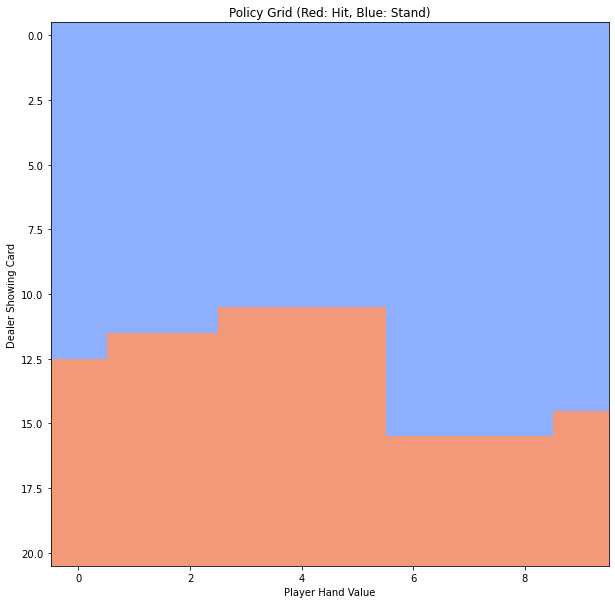

In [86]:
policy = getPlayerOptimalPolicy(M_dealer)
plt.figure(figsize=(10, 10))
plt.imshow(policy, cmap="coolwarm", aspect="auto")

plt.clim(-0.5, 1.5)
plt.xlabel("Player Hand Value")
plt.ylabel("Dealer Showing Card")
plt.title("Policy Grid (Red: Hit, Blue: Stand)")

plt.show()

In [ ]:
def getPlayerOptimalPolicy(dealer_gain_matrix):
	policy = np.zeros((21,10))
	M = np.zeros((21,10))
	for sp in range(21, 0, -1):
		for sd in range(10,0,-1):
			score_hit = 0
			proba_hit_list_sp = proba_hit_list(sp)
			for proba_hit_sp in proba_hit_list_sp:
				new_sp, proba_sp = proba_hit_sp
				score_hit += proba_sp * M[new_sp - 1, sd - 1]
			score_hit += proba_burst(sp) * -1
			score_stand = -dealer_gain_matrix[sp-1, sd-1]
			if sd == 21:
				print(score_hit, score_stand, len(proba_hit_list_sp))
			M[sp - 1, sd - 1] = max(score_hit, score_stand)
			if score_hit > score_stand:
				policy[sp - 1, sd - 1] = HIT
			else:
				policy[sp - 1, sd - 1] = STAND
	return policy